In [51]:
import pandas as pd
# Scikit-Learn ≥0.20 is
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

In [52]:
#Fetching the 4 datasets
y_train_all=pd.read_csv("y_train_all.csv")
x_train_all=pd.read_csv("x_train_all.csv")
y_test_all=pd.read_csv("y_test_all.csv")
x_test_all=pd.read_csv("x_test_all.csv")

**Using Decision trees on the training set to measure the accuracy.**

In [53]:
# Splitting the training data for learning, testing and validation
x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=42)

Using the Linear Discriminant Analysis (LDA) to reduce the dimensionility of the features.

In [54]:
# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_lda = lda.fit_transform(X_train_scaled, y_train.values.ravel())
X_test_lda = lda.transform(X_test_scaled)


```python
 Measuring the accuracy against the max_depth
```

Max depth: 1, Accuracy: 38.65%
Max depth: 2, Accuracy: 62.85%
Max depth: 3, Accuracy: 66.41%
Max depth: 4, Accuracy: 70.18%
Max depth: 5, Accuracy: 76.42%
Max depth: 6, Accuracy: 78.38%
Max depth: 7, Accuracy: 77.61%
Max depth: 8, Accuracy: 77.55%
Max depth: 9, Accuracy: 77.14%
Max depth: 10, Accuracy: 77.14%
Max depth: 11, Accuracy: 77.55%
Max depth: 12, Accuracy: 76.78%
Max depth: 13, Accuracy: 77.19%
Max depth: 14, Accuracy: 77.30%
Max depth: 15, Accuracy: 77.86%
Max depth: 16, Accuracy: 78.07%
Max depth: 17, Accuracy: 78.07%
Max depth: 18, Accuracy: 78.07%
Max depth: 19, Accuracy: 78.07%


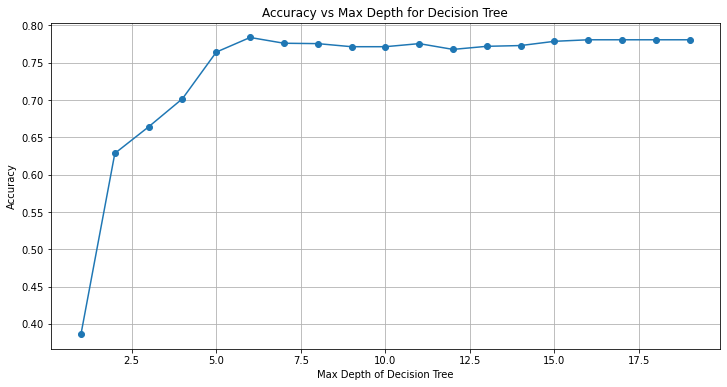

In [55]:

def evaluate_max_depth_range(Xtrain,Xtest,yTrain, yTest, max_depth_range):
    accuracies = []
    # Loop over the desired depth range and record accuracy
    for max_depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf.fit(Xtrain, yTrain)
        y_pred = clf.predict(Xtest)
        accuracy = accuracy_score(yTest, y_pred)
        accuracies.append(accuracy)
        print(f'Max depth: {max_depth}, Accuracy: {accuracy * 100:.2f}%')

    # Create a DataFrame for easy visualization
    results_df = pd.DataFrame({
        'Max Depth': max_depth_range,
        'Accuracy': accuracies
    })

    # Plotting the relationship between max_depth and accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(max_depth_range, accuracies, marker='o')
    plt.xlabel('Max Depth of Decision Tree')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Max Depth for Decision Tree')
    plt.grid(True)
    plt.show()
    # return results_df

# Define the range of max_depth you want to evaluate
max_depth_range = range(1, 20)  # Define a range from 1 to 20

# Call the function with the loaded data and max depth range
evaluate_max_depth_range(X_train_lda,X_test_lda, y_train,y_test, max_depth_range)


Measure the accuracy on the training set using 10-fold cross-validation.

Max depth: 1, Mean Accuracy: 41.98%, Standard Deviation: 0.55%
Max depth: 2, Mean Accuracy: 72.43%, Standard Deviation: 0.94%
Max depth: 3, Mean Accuracy: 80.59%, Standard Deviation: 0.88%
Max depth: 4, Mean Accuracy: 87.47%, Standard Deviation: 0.69%
Max depth: 5, Mean Accuracy: 92.03%, Standard Deviation: 0.71%
Max depth: 6, Mean Accuracy: 93.25%, Standard Deviation: 0.77%
Max depth: 7, Mean Accuracy: 94.00%, Standard Deviation: 0.67%
Max depth: 8, Mean Accuracy: 94.22%, Standard Deviation: 0.54%
Max depth: 9, Mean Accuracy: 94.44%, Standard Deviation: 0.37%
Max depth: 10, Mean Accuracy: 94.52%, Standard Deviation: 0.71%
Max depth: 11, Mean Accuracy: 94.27%, Standard Deviation: 0.74%
Max depth: 12, Mean Accuracy: 94.31%, Standard Deviation: 0.62%
Max depth: 13, Mean Accuracy: 94.17%, Standard Deviation: 0.69%
Max depth: 14, Mean Accuracy: 94.19%, Standard Deviation: 0.79%
Max depth: 15, Mean Accuracy: 94.00%, Standard Deviation: 0.67%
Max depth: 16, Mean Accuracy: 94.05%, Standard De

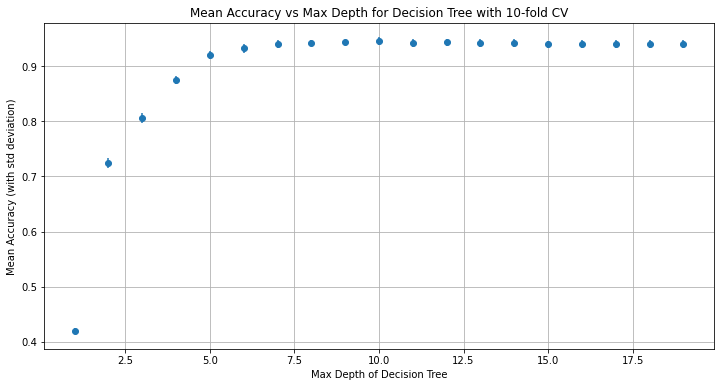

In [56]:

# Defining a function to
def evaluate_max_depth_range_with_cv(X, y, max_depth_range, cv_folds):
    mean_accuracies = []
    std_accuracies = []
    # Loop over the desired depth range and record accuracy
    for max_depth in max_depth_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        # Perform cross-validation and obtain the mean and standard deviation of the scores
        scores = cross_val_score(clf, X, y.values.ravel(), cv=cv_folds, scoring='accuracy')
        mean_accuracies.append(scores.mean())
        std_accuracies.append(scores.std())
        print(f'Max depth: {max_depth}, Mean Accuracy: {scores.mean() * 100:.2f}%, Standard Deviation: {scores.std() * 100:.2f}%')

    # Create a DataFrame for easy table visualization
    results_df = pd.DataFrame({
        'Max Depth': max_depth_range,
        'Mean Accuracy': mean_accuracies,
        'Accuracy Std Deviation': std_accuracies
    })
    # Plotting the relationship between max_depth and mean accuracy
    plt.figure(figsize=(12, 6))
    plt.errorbar(max_depth_range, mean_accuracies, yerr=std_accuracies, fmt='o')
    plt.xlabel('Max Depth of Decision Tree')
    plt.ylabel('Mean Accuracy (with std deviation)')
    plt.title('Mean Accuracy vs Max Depth for Decision Tree with 10-fold CV')
    plt.grid(True)
    plt.show()

    return results_df

# Define the range of max_depth you want to evaluate
max_depth_range = range(1, 20)  # Define a range from 1 to 20

# Calling the function with the loaded data, max depth range, and number of cross-validation folds
results_df = evaluate_max_depth_range_with_cv(X_train_lda, y_train, max_depth_range, cv_folds=10)


The accuracy measured on the training set is consistently lower than the mean accuracy obtained from cross-validation. This could be because the training set accuracy is a more pessimistic estimate when the tree depth is shallow (since a shallow tree may be too simple to capture all patterns in the training data), but as depth increases, it becomes an over-optimistic estimate due to overfitting.
Cross-validation results are more reliable as they give an averaged out performance across multiple subsets of the data, mitigating the chance of an overfitting impact seen in the single training set evaluation.
In conclusion, increasing the maximum depth of a decision tree generally allows it to perform better up to a point, after which the benefits diminish and may even reverse due to overfitting. **The optimal depth in this case appears to be around 10, where the model achieves the highest mean accuracy with cross-validation without an increase in standard deviation**, *indicating a good balance between model complexity and generalizability.*

**Repeating the experiment, this time using training and testing data sets instead of the cross validation.**

Max depth: 1, Accuracy: 41.75%
Max depth: 2, Accuracy: 61.55%
Max depth: 3, Accuracy: 62.78%
Max depth: 4, Accuracy: 68.61%
Max depth: 5, Accuracy: 70.45%
Max depth: 6, Accuracy: 72.94%
Max depth: 7, Accuracy: 75.08%
Max depth: 8, Accuracy: 75.21%
Max depth: 9, Accuracy: 76.57%
Max depth: 10, Accuracy: 76.25%
Max depth: 11, Accuracy: 76.05%
Max depth: 12, Accuracy: 75.31%
Max depth: 13, Accuracy: 75.60%
Max depth: 14, Accuracy: 75.11%
Max depth: 15, Accuracy: 75.89%
Max depth: 16, Accuracy: 76.05%
Max depth: 17, Accuracy: 75.63%
Max depth: 18, Accuracy: 75.63%
Max depth: 19, Accuracy: 75.63%


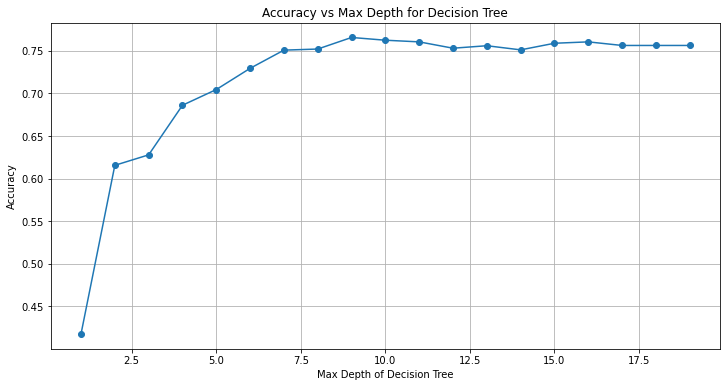

In [57]:
# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(x_train_all)
X_test_all_scaled = scaler.transform(x_test_all)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_all_lda = lda.fit_transform(X_train_all_scaled, y_train_all.values.ravel())
X_test_all_lda = lda.transform(X_test_all_scaled)
evaluate_max_depth_range(X_train_all_lda,X_test_all_lda, y_train_all,y_test_all, max_depth_range)

Max depth: 1, Mean Accuracy: 41.17%, Standard Deviation: 0.88%
Max depth: 2, Mean Accuracy: 59.55%, Standard Deviation: 2.07%
Max depth: 3, Mean Accuracy: 65.83%, Standard Deviation: 1.46%
Max depth: 4, Mean Accuracy: 71.81%, Standard Deviation: 1.77%
Max depth: 5, Mean Accuracy: 74.95%, Standard Deviation: 1.78%
Max depth: 6, Mean Accuracy: 77.80%, Standard Deviation: 1.76%
Max depth: 7, Mean Accuracy: 78.67%, Standard Deviation: 2.25%
Max depth: 8, Mean Accuracy: 79.09%, Standard Deviation: 2.11%
Max depth: 9, Mean Accuracy: 79.06%, Standard Deviation: 2.03%
Max depth: 10, Mean Accuracy: 78.48%, Standard Deviation: 2.19%
Max depth: 11, Mean Accuracy: 78.71%, Standard Deviation: 1.68%
Max depth: 12, Mean Accuracy: 78.83%, Standard Deviation: 2.34%
Max depth: 13, Mean Accuracy: 78.64%, Standard Deviation: 2.65%
Max depth: 14, Mean Accuracy: 78.64%, Standard Deviation: 2.01%
Max depth: 15, Mean Accuracy: 78.25%, Standard Deviation: 1.94%
Max depth: 16, Mean Accuracy: 77.73%, Standard De

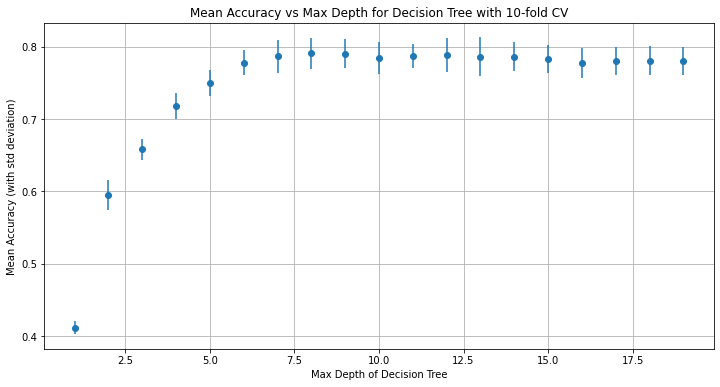

In [58]:
# Calling the function with the loaded data, max depth range, and number of cross-validation folds
results_df = evaluate_max_depth_range_with_cv(X_test_all_lda, y_test_all, max_depth_range, cv_folds=10)

# Observations
- For shallow trees (small max depth), the accuracy is quite low on both the training and testing sets, indicating underfitting, where the model is too simple to capture the underlying patterns in the data.
  
- As the depth increases, we see that the accuracy on the training set generally increases, which is expected because the model can capture more complex patterns with more decision rules. However, we are looking for the model's accuracy on the testing set to increase similarly, which would suggest that the complexity added to the model is capturing general patterns rather than noise.

- At greater depths (max depth 6 and beyond), the accuracy on the training set continues to rise, peaking around depth 6, and then it begins to plateau or slightly decrease. Meanwhile, the testing set accuracy increases until about a max depth of 9, where it reaches its peak before it starts to decline or fluctuate.

- The highest accuracy on the testing set is at max depth 9 with 76.57%, and the training set shows slightly higher figures at deeper levels, which is typical due to overfitting. But the fact that the testing accuracy doesn't fall off dramatically at greater depths is a good sign—it means the model has learned patterns that are at least somewhat generalizable.
- The accuracy on the testing set either declines or stabilizes, but does not improve significantly. This indicates that increasing the depth beyond this point does not help the model perform better on new data, which is a sign of overfitting to the training set.


- The mean accuracy improves dramatically as the tree depth increases, peaking at depth 10 with a mean accuracy of 94.52% and a standard deviation of 0.71%.
- The low standard deviation across all depths indicates that the model's performance is stable across different folds of the training data.
- The high mean accuracy suggests the model fits the training data very well at greater depths.

Cross-Validation on Unseen Dataset:
- The accuracy on the unseen dataset also increases with depth but plateaus and begins to decrease after depth 8.
- The mean accuracy on the unseen data for max depth 8 is 79.09%, with a standard deviation of 2.11%. The increase in standard deviation as compared to the training data suggests that the model's performance is less stable when generalized to new data.
- After depth 8, there's a decrease in mean accuracy and an increase in standard deviation, which suggests that the model may start to overfit the training data. This overfitting is indicated by the model performing less consistently on the unseen data.

- Optimal Depth: The optimal tree depth for this model is around 8, where the accuracy on unseen data is the highest. Beyond this depth, we don't see significant improvement in the mean accuracy, and there's an increase in variability (standard deviation), which likely indicates overfitting.
- Overfitting Beyond Optimal Depth: Beyond the optimal depth (after depth 8), the model's accuracy on the unseen dataset begins to stagnate or decrease slightly, and variability increases. This is a classic sign that the model has begun to memorize the training data rather than learning generalizable patterns.
- Generalization: Up to a tree depth of 8, the model seems to generalize well, as evidenced by increasing accuracy on the unseen data. However, the discrepancy between training and unseen data accuracies at greater depths indicates that what the model learns afterward does not apply as effectively to new data.

Conclusion:
The decision tree model performs best on unseen data at a depth of 8, beyond which the added complexity does not translate to improved generalization. To optimize the model, it would be advisable to restrict the depth to this level or use other forms of regularization, such as adjusting the confidence threshold for pruning or the minimum number of samples per leaf, to prevent the model from overfitting.


**Model Fine tuning** 

**Experimenting with various decision tree parameters that control the depth of the tree, confidence threshold for pruning, and the minimal number of instances permissible per leaf.** 

In [83]:
# Since the code execution environment was reset, we'll need to re-define the function and import the required libraries again.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to run experiments on decision tree parameters
def run_decision_tree_experiments(x, y, xt, yt):
    # Define a range of parameters
    max_depths = [5, 6, 7, 8, 9, 10, 11]  # Explore a range of depths
    min_samples_leafs = [1, 5, 10, 15, 20, 25, 30]  # Increased range
    criteria = ['gini', 'entropy']  # Both splitting criteria
    ccp_alphas = [0.0, 0.005, 0.01, 0.015, 0.02]  # Expanded range

    # Store the results
    experiment_results = []

    # Nested loops to try out different combinations of parameters
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for criterion in criteria:
                for ccp_alpha in ccp_alphas:
                    # Initialize the DecisionTreeClassifier with current set of parameters
                    dt = DecisionTreeClassifier(max_depth=max_depth, 
                                                min_samples_leaf=min_samples_leaf, 
                                                criterion=criterion, 
                                                ccp_alpha=ccp_alpha, 
                                                random_state=0)
                    
                    # Perform 10-fold cross-validation on the training data
                    cv_scores = cross_val_score(dt, x, y.values.ravel(), cv=10)
                    mean_cv_score = np.mean(cv_scores)
                    std_cv_score = np.std(cv_scores)
                    
                    # Fit the model and evaluate on the test set
                    dt.fit(x, y.values.ravel())
                    test_score = dt.score(xt, yt.values.ravel())
                    
                    # Record the results
                    experiment_results.append({
                        'max_depth': max_depth,
                        'min_samples_leaf': min_samples_leaf,
                        'criterion': criterion,
                        'ccp_alpha': ccp_alpha,
                        'mean_cv_score': mean_cv_score,
                        'std_cv_score': std_cv_score,
                        'test_score': test_score
                    })
# Convert results to DataFrame and sort by test score to find the best generalizing models
    results_df = pd.DataFrame(experiment_results)
    best_models = results_df.sort_values(by='test_score', ascending=False).head(10)
    return best_models
# Runing the experiments
experiment_results_df = run_decision_tree_experiments(X_train_all_lda, y_train_all, X_test_all_lda, y_test_all)
experiment_results_df


,max_depth,min_samples_leaf,criterion,ccp_alpha,mean_cv_score,std_cv_score,test_score
155,7,5,entropy,0.0,0.924768,0.020220,0.787379
165,7,10,entropy,0.0,0.922188,0.026084,0.781877
225,8,5,entropy,0.0,0.929102,0.016246,0.781230
295,9,5,entropy,0.0,0.929825,0.014675,0.779935
175,7,15,entropy,0.0,0.925903,0.020860,0.779288
215,8,1,entropy,0.0,0.929928,0.017073,0.778964
365,10,5,entropy,0.0,0.928277,0.016661,0.778641
435,11,5,entropy,0.0,0.928277,0.015876,0.778317
285,9,1,entropy,0.0,0.930857,0.016819,0.777346
145,7,1,entropy,0.0,0.926729,0.018984,0.777346


In [74]:
experiment_results_df.sort_values("test_score").head(10)

,max_depth,min_samples_leaf,criterion,ccp_alpha,mean_cv_score,std_cv_score,test_score
416,10,30,entropy,0.005,0.917441,0.022511,0.761812
75,6,1,entropy,0.000,0.920537,0.024926,0.761812
276,8,30,entropy,0.005,0.917441,0.022511,0.761812
370,10,10,gini,0.000,0.920537,0.025713,0.761812
126,6,25,entropy,0.005,0.917028,0.023840,0.762460
266,8,25,entropy,0.005,0.918576,0.022706,0.762460
476,11,25,entropy,0.005,0.918576,0.022706,0.762460
406,10,25,entropy,0.005,0.918576,0.022706,0.762460
336,9,25,entropy,0.005,0.918576,0.022706,0.762460
196,7,25,entropy,0.005,0.918473,0.022662,0.762460


Conclusion:  

- Model accuracy increases with tree depth, showing better pattern recognition with more complexity, up to a certain point.


- Beyond a depth of 6, accuracy gains are minimal, **hinting at overfitting** where the model may start to learn the noise in the training data.
Optimal Depth Determination:

- A tree depth of **6 or 7** yields the **best trade-off between accuracy and model simplicity**, indicating these levels as **optimal for preventing overfitting while maintaining high predictive performance.**

- Regularization introduced through **ccp_alpha** shows varied effects; however, the best results were obtained **without its application**, suggesting minimal benefit from pruning in this context.

**Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets**

In [84]:
# Splitting the training data for learning, testing and validation
x_train7030, x_test7030, y_train7030, y_test7030 = train_test_split(x_train_all, y_train_all, test_size=0.3, random_state=42)

# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train7030)
X_test_scaled = scaler.transform(x_test7030)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_lda7030 = lda.fit_transform(X_train_scaled, y_train7030.values.ravel())
X_test_lda7030 = lda.transform(X_test_scaled)

In [85]:
# Expriminting the model with 70-30% splitting ratio 
experiment_results_df7030 = run_decision_tree_experiments(X_train_lda7030, y_train7030, X_test_lda7030, y_test7030)


In [87]:
experiment_results_df7030

,max_depth,min_samples_leaf,criterion,ccp_alpha,mean_cv_score,std_cv_score,test_score
145,7,1,entropy,0.0,0.948103,0.008196,0.759202
435,11,5,entropy,0.0,0.946629,0.008427,0.755762
295,9,5,entropy,0.0,0.946482,0.008225,0.755418
225,8,5,entropy,0.0,0.947513,0.007827,0.754730
215,8,1,entropy,0.0,0.949135,0.006654,0.754042
365,10,5,entropy,0.0,0.946482,0.008586,0.753698
385,10,15,entropy,0.0,0.941466,0.009584,0.753010
455,11,15,entropy,0.0,0.941466,0.009584,0.753010
355,10,1,entropy,0.0,0.945891,0.006970,0.752666
75,6,1,entropy,0.0,0.945448,0.008991,0.751978


**Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets**

In [88]:
# Splitting the training data for learning, testing and validation
x_train4060, x_test4060, y_train4060, y_test4060 = train_test_split(x_train_all, y_train_all, test_size=0.6, random_state=42)

In [89]:
# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train4060)
X_test_scaled = scaler.transform(x_test4060)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_lda4060 = lda.fit_transform(X_train_scaled, y_train4060.values.ravel())
X_test_lda4060 = lda.transform(X_test_scaled)

In [90]:
# Expriminting the model with 40-60% splitting ratio 
experiment_results_df4060 = run_decision_tree_experiments(X_train_lda4060, y_train4060, X_test_lda4060, y_test4060)

In [91]:
experiment_results_df4060

,max_depth,min_samples_leaf,criterion,ccp_alpha,mean_cv_score,std_cv_score,test_score
215,8,1,entropy,0.000,0.971104,0.008534,0.547472
425,11,1,entropy,0.000,0.972913,0.007660,0.546268
356,10,1,entropy,0.005,0.966206,0.010138,0.545408
146,7,1,entropy,0.005,0.965947,0.008834,0.545408
216,8,1,entropy,0.005,0.965690,0.009147,0.545408
155,7,5,entropy,0.000,0.968527,0.009129,0.545064
300,9,10,gini,0.000,0.960787,0.009051,0.544720
440,11,10,gini,0.000,0.960787,0.009051,0.544720
370,10,10,gini,0.000,0.960787,0.009051,0.544720
225,8,5,entropy,0.000,0.968012,0.010380,0.544548


**Analyse your results from the point of view of the problem of classifier over-fitting. Do you notice the effects of over-fitting? How? Note your conclusions in the Jupyter notebook.**

It's noticeable that when the size of the training dataset is reduced from 70% to 40%, there is an increase in the cross-validation score but a decrease in the test score. **This is a strong indicator that the model is overfitting**, as it performs better on the smaller training set and validation folds but worse on the independent test data.

In [60]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train_lda, y_train.values.ravel())

DecisionTreeClassifier(max_depth=8, random_state=42)

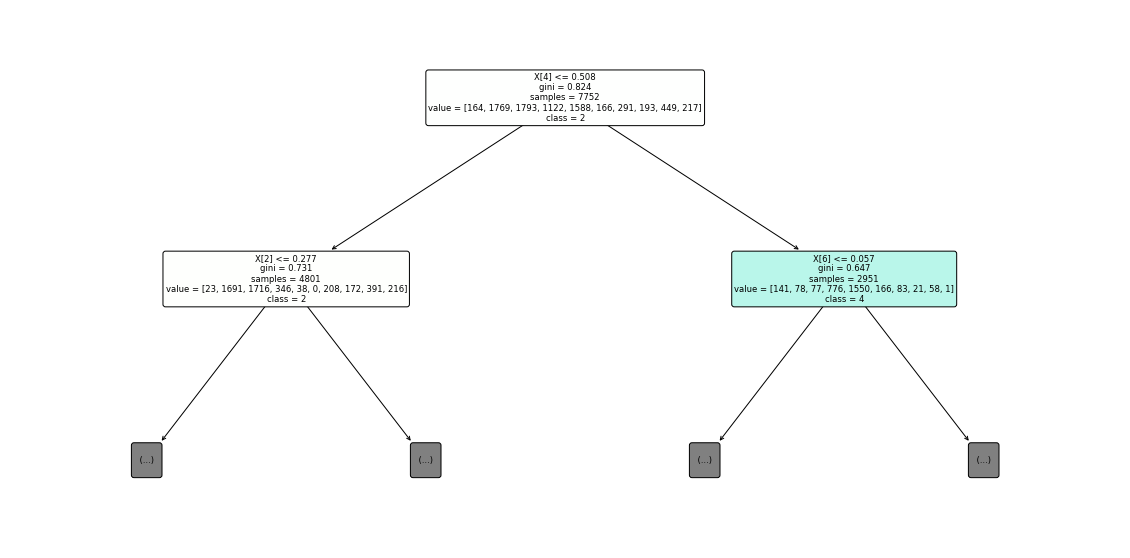

In [61]:
# Plot the top of the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size as large as needed
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['0', '1', '2','3', '4', '5','6', '7', '8','9'],
    max_depth= 1 # Only plot the top 3 levels for clarity
)
plt.show()


In [62]:
# Normalize feature data since LDA is affected by scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_all)
X_test_scaled = scaler.transform(x_test_all)
# Initialize LDA and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=None)  # selecting the maximum number of possible features using LDA = number of classes-1
X_train_lda = lda.fit_transform(X_train_scaled, y_train_all.values.ravel())
X_test_lda = lda.transform(X_test_scaled)

In [63]:
clf = DecisionTreeClassifier(max_depth=11, random_state=42)
clf.fit(X_train_lda, y_train_all.values.ravel())

DecisionTreeClassifier(max_depth=11, random_state=42)

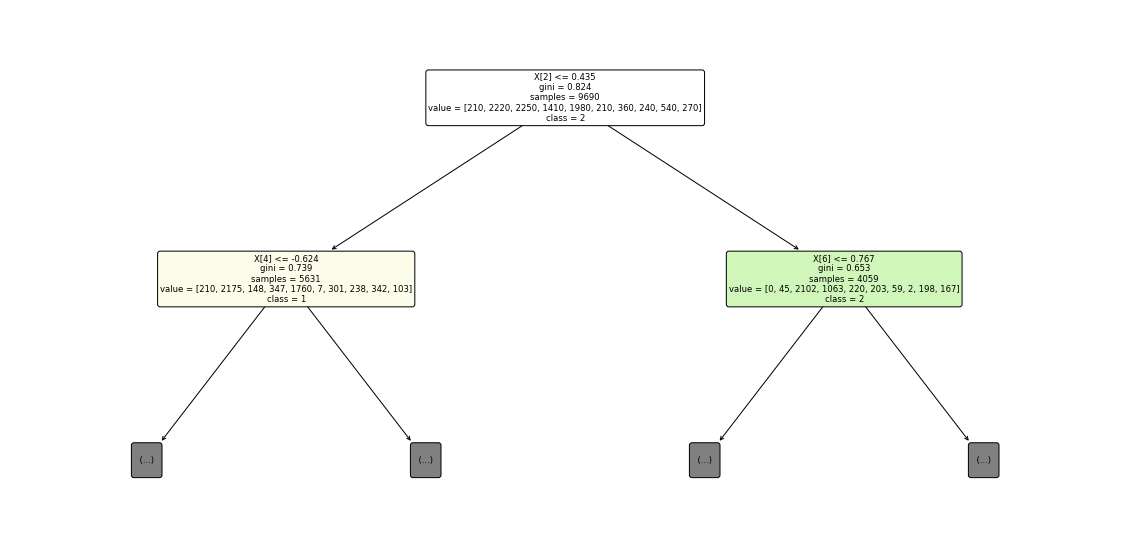

In [64]:
# Plot the top of the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size as large as needed
plot_tree(
    clf,
    filled=True,
    rounded=True,
    class_names=['0', '1', '2','3', '4', '5','6', '7', '8','9'],
    max_depth= 1 # Only plot the top 3 levels for clarity
)
plt.show()
